In [34]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

a. Đọc bộ dữ liệu MNIST từ Keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


b. In ra kích thước của tập train, test

In [3]:
print(f"Training data (images) shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data (images) shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training data (images) shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data (images) shape: (10000, 28, 28)
Test labels shape: (10000,)


c. Chuẩn hóa các giá trị pixel của ảnh về đoạn [0,1]

In [4]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# In kích thước của tập train và test
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


d. Định nghĩa hàm create_model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Flatten, Dense, Dropout

def create_model():
    # Xây dựng mô hình Sequential
    model = Sequential()

    # Flatten layer: Chuyển đổi hình ảnh từ kích thước (28, 28) thành vector 1D (784 chiều)
    model.add(Flatten(input_shape=(28, 28)))

    # Dense layer: Lớp ẩn với 128 neuron và hàm kích hoạt ReLU
    model.add(Dense(128, activation='relu'))

    # Dropout layer: Giảm overfitting, ngẫu nhiên tắt 20% các neuron trong lớp
    model.add(Dropout(0.2))

    # Output layer: Lớp với 10 neuron (số lượng lớp là 10 cho 10 chữ số) và hàm kích hoạt softmax
    model.add(Dense(10, activation='softmax'))

    # Biên dịch mô hình
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [37]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

e. Huấn luyện mô hình bằng k-fold cross validation (với k=10).

In [46]:
# KFold cross-validation (k=10)


accuracy_per_fold = []
loss_per_fold = []
models = []

for train_index, val_index in kf.split(train_images):
  model = create_model()
  X_train_fold, X_val_fold = train_images[train_index], train_images[val_index]
  y_train_fold, y_val_fold = train_labels[train_index], train_labels[val_index]
  # Huấn luyện mô hình
  history = model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=1)

  # Lưu model huấn luyện được
  models.append(model)

  # Lưu accuracy và loss của fold
  scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
  accuracy_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])
  print(f"Fold accuracy: {scores[1]}, Fold loss: {scores[0]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8490 - loss: 0.5118 - val_accuracy: 0.9517 - val_loss: 0.1607
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9503 - loss: 0.1650 - val_accuracy: 0.9677 - val_loss: 0.1128
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9649 - loss: 0.1158 - val_accuracy: 0.9718 - val_loss: 0.0910
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9712 - loss: 0.0904 - val_accuracy: 0.9773 - val_loss: 0.0753
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9749 - loss: 0.0772 - val_accuracy: 0.9772 - val_loss: 0.0749
Fold accuracy: 0.9771666526794434, Fold loss: 0.07491663843393326
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8530 - loss: 0.5063 - val_accuracy: 0.9573 - val_loss: 0.1620
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9541 - loss: 0.1543 - val_accuracy: 0.9662 - val_loss: 0.1112
Epoch 3/5
1688/1688 ━━━━━━━

f. Tính và in ra Mean Accuracy, Standard deviation accuracy (độ lệch chuẩn
của Accuracy), Mean Loss, Standard deviation loss của mô hình trong quá
trình huấn luyện

In [47]:
mean_accuracy = np.mean(accuracy_per_fold)
std_accuracy = np.std(accuracy_per_fold)
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

# In ra kết quả Mean và Standard Deviation của Accuracy và Loss
print(f"\nMean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
print(f"Mean Loss: {mean_loss:.4f}")
print(f"Standard Deviation of Loss: {std_loss:.4f}")


Mean Accuracy: 0.9746
Standard Deviation of Accuracy: 0.0013
Mean Loss: 0.0857
Standard Deviation of Loss: 0.0060


g. Vẽ biểu đồ thể hiện accuracy, loss sau mỗi fold.

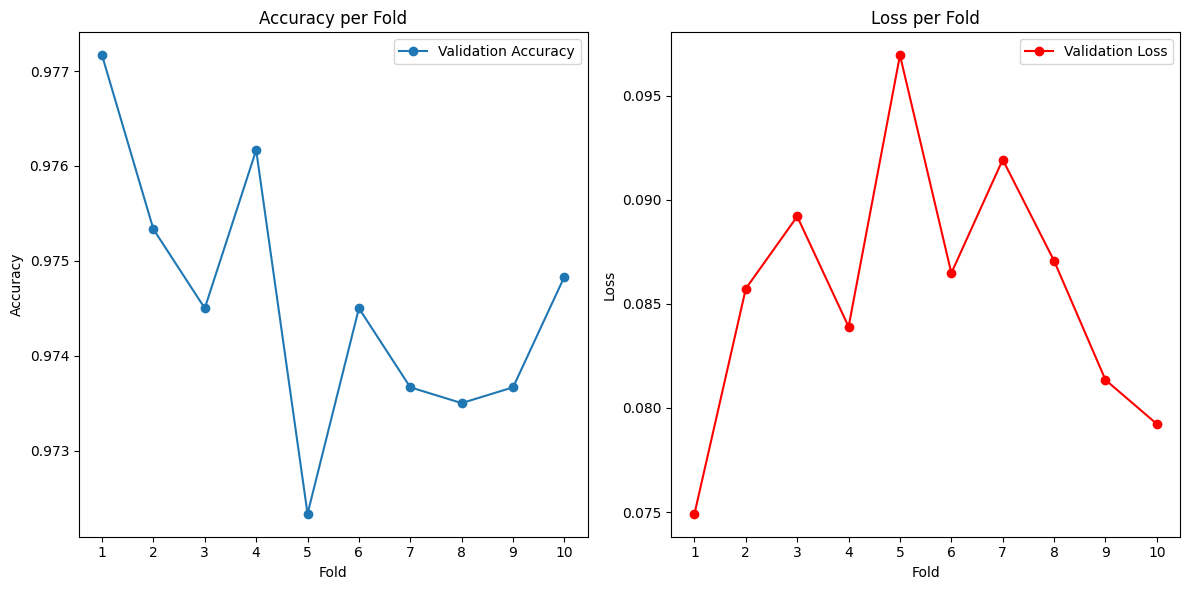

In [49]:
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), accuracy_per_fold, marker='o', label='Validation Accuracy')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), loss_per_fold, marker='o', label='Validation Loss', color='red')
plt.title('Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.xticks(range(1, 11))
plt.legend()

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

h. Sử dụng mô hình có Accuracy tốt nhất giữa các fold trong quá trình huấn
luyện và phân lớp cho tập test.

In [56]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# 1. Tìm fold có accuracy tốt nhất
best_fold_index = np.argmax(accuracy_per_fold)  # Tìm chỉ số của fold có accuracy cao nhất
best_model = models[best_fold_index]  # Lấy mô hình có accuracy tốt nhất

# 2. Dự đoán nhãn lớp cho tập test bằng mô hình tốt nhất
test_predictions = best_model.predict(test_images)  # Dự đoán trên tập test

# Chuyển xác suất thành nhãn lớp (chọn lớp có xác suất cao nhất)
predicted_classes = np.argmax(test_predictions, axis=1)


test_accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy on test set: {test_accuracy:.4f}")

# 4. Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_classes, average=None)

print("\nPrecision, Recall, F1-score của từng lớp:")
for i in range(10):  # MNIST có 10 lớp (0-9)
    print(f"Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}")

# Tính các giá trị trung bình
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
f1_avg = np.mean(f1)

print("\nAverage Precision, Recall, F1-score:")
print(f"Precision (average): {precision_avg:.4f}")
print(f"Recall (average): {recall_avg:.4f}")
print(f"F1-score (average): {f1_avg:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy on test set: 0.9758

Precision, Recall, F1-score của từng lớp:
Class 0: Precision = 0.9827, Recall = 0.9867, F1-score = 0.9847
Class 1: Precision = 0.9920, Recall = 0.9894, F1-score = 0.9907
Class 2: Precision = 0.9619, Recall = 0.9797, F1-score = 0.9707
Class 3: Precision = 0.9819, Recall = 0.9683, F1-score = 0.9751
Class 4: Precision = 0.9844, Recall = 0.9664, F1-score = 0.9753
Class 5: Precision = 0.9808, Recall = 0.9742, F1-score = 0.9775
Class 6: Precision = 0.9822, Recall = 0.9781, F1-score = 0.9801
Class 7: Precision = 0.9772, Recall = 0.9601, F1-score = 0.9686
Class 8: Precision = 0.9585, Recall = 0.9733, F1-score = 0.9659
Class 9: Precision = 0.9565, Recall = 0.9802, F1-score = 0.9682

Average Precision, Recall, F1-score:
Precision (average): 0.9758
Recall (average): 0.9756
F1-score (average): 0.9757


i. Tính và in ra Accuracy của mô hình trên tập test

In [58]:
test_accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy on test set: {test_accuracy:.4f}")

Accuracy on test set: 0.9758


j. Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của
mô hình trên tập test

In [61]:
# 2. Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, predicted_classes, average=None)
print("\nPrecision, Recall, F1-score của từng lớp:")
for i in range(10):  # MNIST có 10 lớp (0-9)
    print(f"Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}")
# Tính các giá trị trung bình
precision_avg = np.mean(precision)
recall_avg = np.mean(recall)
f1_avg = np.mean(f1)

print("\nAverage Precision, Recall, F1-score:")
print(f"Precision (average): {precision_avg:.4f}")
print(f"Recall (average): {recall_avg:.4f}")
print(f"F1-score (average): {f1_avg:.4f}")


Precision, Recall, F1-score của từng lớp:
Class 0: Precision = 0.9827, Recall = 0.9867, F1-score = 0.9847
Class 1: Precision = 0.9920, Recall = 0.9894, F1-score = 0.9907
Class 2: Precision = 0.9619, Recall = 0.9797, F1-score = 0.9707
Class 3: Precision = 0.9819, Recall = 0.9683, F1-score = 0.9751
Class 4: Precision = 0.9844, Recall = 0.9664, F1-score = 0.9753
Class 5: Precision = 0.9808, Recall = 0.9742, F1-score = 0.9775
Class 6: Precision = 0.9822, Recall = 0.9781, F1-score = 0.9801
Class 7: Precision = 0.9772, Recall = 0.9601, F1-score = 0.9686
Class 8: Precision = 0.9585, Recall = 0.9733, F1-score = 0.9659
Class 9: Precision = 0.9565, Recall = 0.9802, F1-score = 0.9682

Average Precision, Recall, F1-score:
Precision (average): 0.9758
Recall (average): 0.9756
F1-score (average): 0.9757


k. Hiển thị confusion matrix bằng heat map (bản đồ nhiệt)

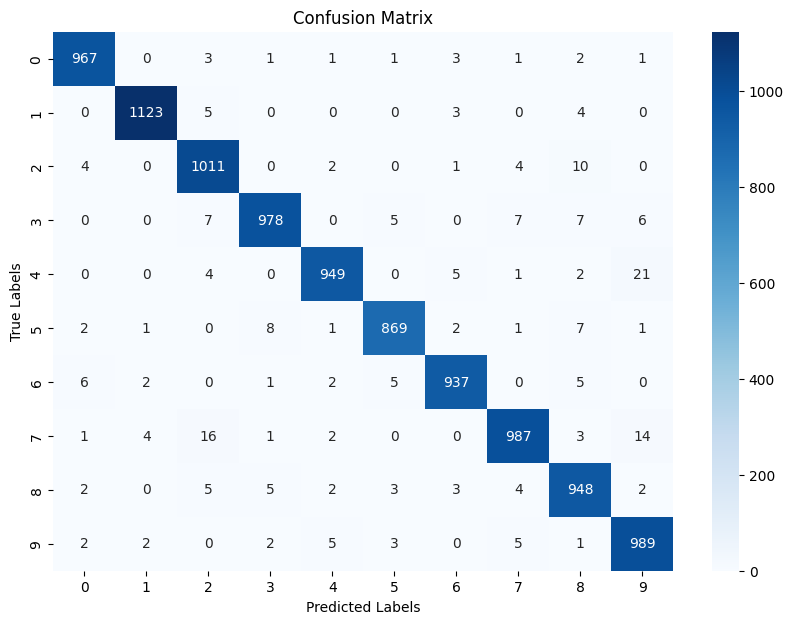

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
cm = confusion_matrix(test_labels, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

l. In ra kết quả phân lớp của 05 ảnh đầu tiên trong tập test

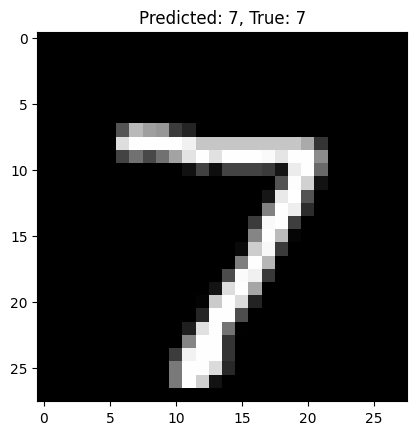

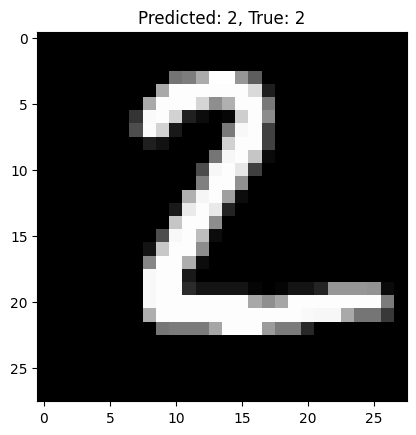

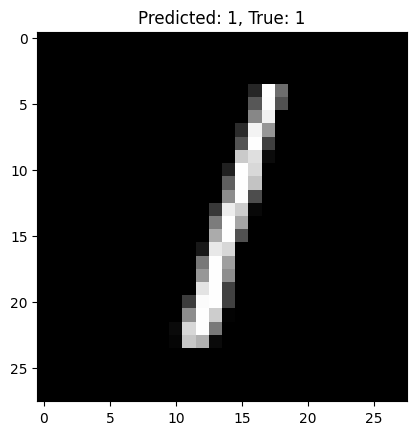

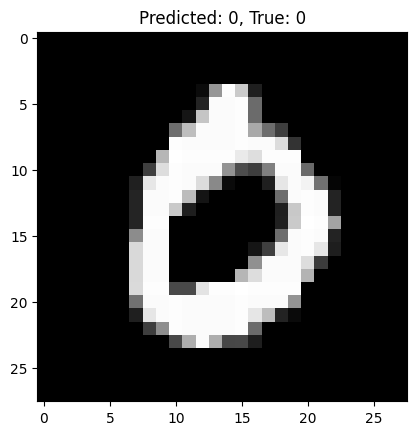

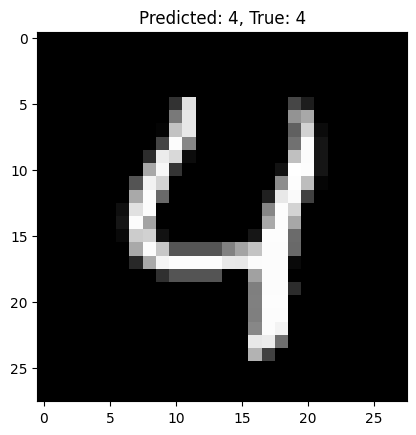

In [66]:
for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, True: {test_labels[i]}")
    plt.show()